In [6]:
#Diabetes_Prediction_logisticRegression
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
cwd
Dataset_Diabetes=pd.read_csv('../Machine_Learning/Logistic_regression_assignment/diabetes.csv')
Dataset_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Dataset_Diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:

#Dataset_Diabetes.plot(kind='scatter',x='Pregnancies',y='Outcome')
from sklearn.cross_validation import train_test_split
from sklearn import metrics
 
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x=Dataset_Diabetes[features]
y=Dataset_Diabetes['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


from sklearn.linear_model import LogisticRegression
logistReg = LogisticRegression(class_weight='balanced')
logistReg.fit(x_train,y_train)
#y_predict = logistReg.predict_proba(x_test)
y_predict = logistReg.predict(x_test)
rmse = metrics.mean_squared_error(y_test,y_predict)
accuracy = metrics.accuracy_score(y_test,y_predict)
#y_predict_class=logistReg.

In [11]:
#print(rmse)
print(accuracy)

0.23958333333333334
0.7604166666666666


In [18]:
y_test.value_counts()
1-y_test.mean()

0.6979166666666667

In [19]:
#calculate null accuracy
max(y_test.mean() ,1-y_test.mean())

0.6979166666666667

In [26]:
print('test',y_test.values[0:20])
print('pred',y_predict[0:20])



test [0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1]
pred [0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1]


In [30]:
#confusion matric
print(metrics.confusion_matrix(y_test,y_predict))
confm=metrics.confusion_matrix(y_test,y_predict)
#confm

[[107  27]
 [ 19  39]]


array([[107,  27],
       [ 19,  39]])

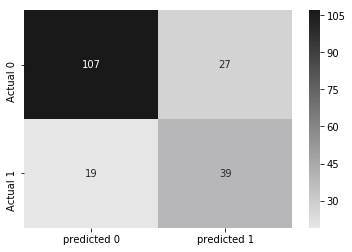

In [46]:
import seaborn as sns
cmap=sns.cubehelix_palette(50,hue=0.04,rot=0,light=0.9,dark=0.1,as_cmap=True)
sns.heatmap(confm,cmap=cmap,fmt='d',annot=True,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'])

In [48]:
#sensitivity = TP/TP + FN it is also called recall
sensitivity = metrics.recall_score(y_test,y_predict)
print(sensitivity)

0.6724137931034483


In [52]:
TN = confm[0,0]
FP=confm[0,1]
false_positive_rate=FP/(TN + FP)

specifity =  TN /(TN+FP)
print(1-specifity)

0.20149253731343286


In [54]:
#percision TP/TP+FP
preci = metrics.precision_score(y_test,y_predict)
print(preci)

0.5909090909090909


In [80]:
logistReg.predict(x_test)[0:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [84]:
logistReg.predict_proba(x_test)
#y_pred_probs=logistReg.predict_proba(x_test)[:,1]
#y_pred_probs

array([[0.86804153, 0.13195847],
       [0.70556272, 0.29443728],
       [0.821932  , 0.178068  ],
       [0.67892393, 0.32107607],
       [0.38837768, 0.61162232],
       [0.75365603, 0.24634397],
       [0.83511612, 0.16488388],
       [0.45840077, 0.54159923],
       [0.84491289, 0.15508711],
       [0.33471299, 0.66528701],
       [0.45473681, 0.54526319],
       [0.40966918, 0.59033082],
       [0.20701402, 0.79298598],
       [0.70111165, 0.29888835],
       [0.91997358, 0.08002642],
       [0.13780006, 0.86219994],
       [0.13484463, 0.86515537],
       [0.89566348, 0.10433652],
       [0.55504727, 0.44495273],
       [0.11429197, 0.88570803],
       [0.04952114, 0.95047886],
       [0.13333115, 0.86666885],
       [0.74949268, 0.25050732],
       [0.53791041, 0.46208959],
       [0.78536037, 0.21463963],
       [0.82486052, 0.17513948],
       [0.31686826, 0.68313174],
       [0.4975699 , 0.5024301 ],
       [0.71019647, 0.28980353],
       [0.57405599, 0.42594401],
       [0.

In [96]:
logistReg.predict_proba(x_test)[0:10,1]
y_pred_probs=logistReg.predict_proba(x_test)[0:,1]

#y_pred_probs

Text(0.5, 1.0, 'Histogram of predicted probabilities')

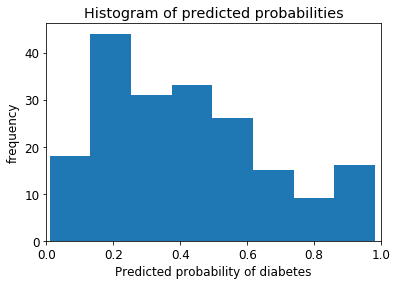

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=12
plt.hist(y_pred_probs,bins=8)
plt.xlim(0,1)
plt.xlabel("Predicted probability of diabetes")
plt.ylabel('frequency')
plt.title('Histogram of predicted probabilities')

In [111]:
#use binarize
from sklearn.preprocessing import binarize
y_pred_probs2=logistReg.predict_proba(x_test)
y_pred_class = binarize(y_pred_probs2,0.4)[:,1]
y_pred_class[0:10]

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1.])

In [112]:
confm

array([[107,  27],
       [ 19,  39]])

In [113]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[86, 48],
       [13, 45]])

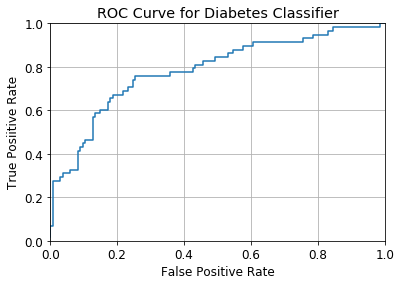

In [114]:
#ROC Curve: and AUC ..Cross Validation
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_probs)

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('ROC Curve for Diabetes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Posiitive Rate')
plt.grid(True)

In [115]:
print(metrics.roc_auc_score(y_test,y_pred_probs))

0.7848687596500257


In [119]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logistReg,x,y,cv=10,scoring='roc_auc',verbose=True).mean()


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
